# Notebook for The Excellent Store Prediction Challenge 

## Introduction
This notebook addresses __`The Excellent Store Sales Prediction Challenge`__ on Zindi. It covers the fundamental steps of loading the dataset, performing Exploratory Data Analysis (EDA), preprocessing the data, and building a baseline machine learning model to predict sales returns. This submission serves as a foundational approach to the competition.


## Store Sales Dataset Variable Descriptions
The dataset includes 13 variables, consisting of 5 numeric variables and 8 categorical variables. Below are the definitions and descriptions of each variable:

| Variable Name         | Type        | Description                                                                                                                              |
| :-------------------- | :---------- | :--------------------------------------------------------------------------------------------------------------------------------------- |
| **Item_ID** | Categorical | Unique product ID.                                                                                                                       |
| **Item_Weight** | Numeric     | Weight of the product.                                                                                                                   |
| **Item_Sugar_Content**| Categorical | Sugar content of the product.                                                                                                            |
| **Item_Visibility** | Numeric     | The percentage of total display area of all products in Chief Babatunji’s supermarket allocated to the particular product.                 |
| **Item_Type** | Categorical | The category to which the product belongs.                                                                                               |
| **Item_Price** | Numeric     | Retail price of the product.                                                                                                             |
| **Store_ID** | Categorical | Unique store ID.                                                                                                                         |
| **Store_Start_Year** | Numeric     | The year in which store was opened.                                                                                                      |
| **Store_Size** | Categorical | The size of the store in terms of total ground area covered.                                                                             |
| **Store_Location_Type**| Categorical | The type of city in which the store is located.                                                                                          |
| **Store_Type** | Categorical | Description of the store based on category of items sold.                                                                                |
| **Item_Store_ID** | Categorical | Unique identifier of each product type per supermarket.                                                                                  |
| **Item_Store_Returns**| Numeric     | Profit returns on the product in the particular store. This is the outcome variable to be predicted.                                     |

## Importing Libraries
This notebook outlines the process of importing Python libraries for a data analysis project focused on the Supermarket Sales Dataset. This dataset provides valuable insights into various aspects of product sales within supermarkets, including item characteristics, store details, and sales performance. These libraries will enable us to acquire, manage, analyze, and visualize data related to these sales, ultimately aiming to understand factors influencing returns and to build robust machine learning models for prediction. The libraries are categorized based on their primary function:


* **Data Manipulation and Analysis:** Libraries like `pandas` (`pd`) are used for working with structured data, including cleaning, transformation, and statistical analysis. `numpy` (`np`) provides tools for numerical computing and array operations, which are fundamental to many data manipulation tasks.<br>

* **Data Visualization:** `matplotlib.pyplot` (`plt`) is a fundamental plotting library, while `seaborn` (`sns`) offers high-level statistical visualizations. These enable the creation of informative visualizations for data exploration and presentation.<br>

* **Machine Learning Model Building:**
    * **Data Processing:** Modules like `train_test_split` (for splitting data into training and testing sets), `LabelEncoder` (for encoding categorical variables), and `KNNImputer` (for handling missing data) from `sklearn.model_selection` and `sklearn.preprocessing` provide tools for preparing data for modeling.
    * **Modeling Algorithms:** `CatBoostRegressor` are examples of algorithms used for developing and training predictive models.
    * **Model Evaluation:** `r2_score` and `mean_absolute_error` from `sklearn.metrics` are used for evaluating the performance of these predictive models.

* **System Utilities:** Libraries such as `warnings` are used to manage system-level functionalities, like suppressing warning messages for cleaner output.



In [1]:
# -------------------------------
# Core Data Processing
# -------------------------------
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical computing and array operations

# -------------------------------
# Data Visualization
# -------------------------------
import matplotlib.pyplot as plt  # Fundamental plotting library
import seaborn as sns           # High-level statistical visualizations

# -------------------------------
# Machine Learning
# -------------------------------
# Model evaluation
from sklearn.metrics import r2_score,mean_absolute_error

# Data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Modeling algorithms
from catboost import CatBoostRegressor

# -------------------------------
# System Utilities
# -------------------------------
import warnings
warnings.filterwarnings("ignore")  # Cleaner output by suppressing warnings

## Data Loading and Inspection
After importing the necessary libraries, the next crucial step is to load the Supermarket Sales Dataset into a suitable format for analysis. In Python, the pandas library's DataFrame object is the standard way to represent tabular data. Once loaded, it's essential to inspect the data to understand its structure, content, and characteristics.

#### 1. Loading Data with Pandas
Pandas supports reading data from various formats, including CSV, Excel, SQL databases, and more. The appropriate function is used based on the file type. We load the train dataset.


In [2]:
train = pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")

In [3]:
train['Train'] = 1
test['Train'] = 0

data = pd.concat([train, test])

#### 2. Inspecting the Data
Once the data is loaded into a DataFrame, it's crucial to inspect it to understand its structure and content. Here are some key methods:

* **`.head()`**: Displays the first 5 rows of the DataFrame (or a specified number). This provides a quick look at the data's format and some sample values.

Let's take a look at the first few rows of each dataset to understand their structure.


In [4]:
data.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Train
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08,1
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,1
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,1
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,1
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,1


* **`.info()`**: Provides a concise summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8522 entries, 0 to 3531
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              8522 non-null   object 
 1   Store_ID             8522 non-null   object 
 2   Item_Store_ID        8522 non-null   object 
 3   Item_Weight          7059 non-null   float64
 4   Item_Sugar_Content   8522 non-null   object 
 5   Item_Visibility      8522 non-null   float64
 6   Item_Type            8522 non-null   object 
 7   Item_Price           8522 non-null   float64
 8   Store_Start_Year     8522 non-null   int64  
 9   Store_Size           6113 non-null   object 
 10  Store_Location_Type  8522 non-null   object 
 11  Store_Type           8522 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
 13  Train                8522 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 998.7+ KB


* **`Observation (Missing Data):`** Missing values are present in several features and will need to be addressed through imputation or removal strategies.
<br>

* **`.isnull.sum`**: Returns the number of missing (NaN/None) values per column. This is critical for understanding data completeness.

In [6]:
# Check the percentage of missing values:
(data.isnull().sum() / len(data)) * 100

Item_ID                 0.000000
Store_ID                0.000000
Item_Store_ID           0.000000
Item_Weight            17.167332
Item_Sugar_Content      0.000000
Item_Visibility         0.000000
Item_Type               0.000000
Item_Price              0.000000
Store_Start_Year        0.000000
Store_Size             28.268012
Store_Location_Type     0.000000
Store_Type              0.000000
Item_Store_Returns     41.445670
Train                   0.000000
dtype: float64

* **`Observation (Missing Data):`** We observe missing values in two key features: `Item_Weight` and `Store_Size`. The remaining variables are complete.
<br>

* **`.describe()`**: Generates descriptive statistics of the numerical columns in the DataFrame, such as mean, standard deviation, minimum, and maximum values. This helps in understanding the distribution and range of the data.

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns,Train
count,7059.000000,8522.000000,8522.000000,8522.000000,4990.000000,8522.000000
mean,12.857115,0.066134,352.471687,2004.831847,6103.520164,0.585543
std,4.643572,0.051600,155.693760,8.372251,4447.333835,0.492657
min,4.555000,0.000000,78.230000,1992.000000,83.230000,0.000000
25%,8.772500,0.026988,234.542500,1994.000000,2757.660000,0.000000
50%,12.600000,0.053935,357.450000,2006.000000,5374.675000,1.000000
75%,16.850000,0.094594,464.130000,2011.000000,8522.240000,1.000000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000,1.000000


* **`.duplicated().sum()`**: Counts the number of duplicate rows in the DataFrame.

In [8]:
data.duplicated().sum()

0

* **`Observation (No Duplicate Data):`** We found no duplicate rows within the dataset.
<br>

* **`.unique()`**: identifies unexpected or erroneous unique values that might indicate data entry errors (e.g., typos in categories)

In [9]:
category_columns = ['Item_Sugar_Content', 'Item_Type', 'Store_Size', 'Store_Location_Type',
                   'Store_Type']

for i in category_columns:
    print(i)
    print(data[i].unique(), end='\n')

Item_Sugar_Content
['Low Sugar' 'Ultra Low Sugar' 'Normal Sugar']
Item_Type
['Soft Drinks' 'Dairy' 'Hard Drinks' 'Canned' 'Frozen Foods'
 'Fruits and Vegetables' 'Snack Foods' 'Baking Goods' 'Starchy Foods'
 'Meat' 'Seafood' 'Breakfast' 'Breads' 'Health and Hygiene' 'Household'
 'Others']
Store_Size
[nan 'High' 'Medium' 'Small']
Store_Location_Type
['Cluster 3' 'Cluster 2' 'Cluster 1']
Store_Type
['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']


* **`Observation (No Data Entry Errors Detected):`** Beyond the identified missing values in the `Store_Size` column, no unexpected or erroneous unique values were found, suggesting the absence of significant data entry errors within the dataset.

## Exploratory Data Analysis (EDA) and Data Cleaning

In this section, we will thoroughly explore the training data to understand the relationships and distributions of features, identify patterns, and prepare the dataset for model building. This will involve:

- **Feature Correlation Analysis:** Understanding relationships between numerical features
- **Missing Data Analysis:** Identifying and strategizing for imputation.
- **Univariate Analysis:** Examining individual variable distributions.
- **Bivariate/Multivariate Analysis:** Exploring relationships between variables.
- **Outlier Detection:** Identifying and considering approaches for extreme values.
<br>
Let's go

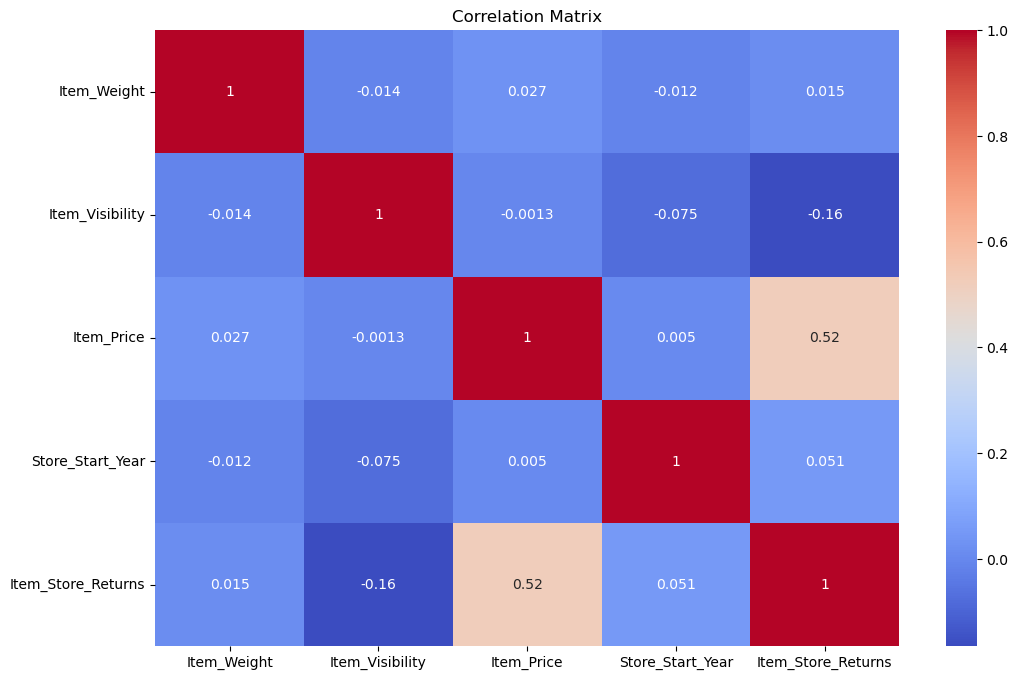

In [10]:
correlation = data.corr().drop("Train").drop('Train', axis=1)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observation (Feature Correlations) from Heatmap

The correlation matrix heatmap visually represents the Pearson correlation coefficients between the numerical features in our dataset. The color intensity and the values indicate the strength and direction of the linear relationship between variables.

From the heatmap, we can make the following key observations:

1.  **`Item_Price` and `Item_Store_Returns`:** There is a **moderately strong positive correlation (0.52)** between `Item_Price` and `Item_Store_Returns`. This suggests that, generally, as the price of an item increases, the profit returns on that item in a store tend to increase as well. This is a very important relationship for our prediction task.

2.  **`Item_Visibility` and `Item_Store_Returns`:** We observe a **weak negative correlation (-0.16)** between `Item_Visibility` and `Item_Store_Returns`. This counter-intuitive finding might suggest that simply allocating more display area (higher visibility) doesn't necessarily translate to higher returns, or perhaps there are other confounding factors at play. Further investigation during univariate/bivariate analysis might be needed to understand this relationship better, or it could indicate a non-linear relationship.

3.  **Other Correlations with `Item_Store_Returns`:**
    * `Item_Weight` shows a very weak positive correlation (0.015) with `Item_Store_Returns`, indicating almost no linear relationship.
    * `Store_Start_Year` also shows a very weak positive correlation (0.051) with `Item_Store_Returns`, suggesting the age of the store has minimal linear impact on returns.

4.  **Correlations Among Independent Variables:**
    * `Item_Price` has a **weak positive correlation (0.16)** with `Store_Start_Year`.
    * `Item_Weight` and `Item_Visibility` show very weak correlations with other features, suggesting they are largely independent of the other numerical predictors in a linear sense.
    * There doesn't appear to be any significant multicollinearity (strong correlations between independent variables) that would immediately cause concern for linear models based on these numerical features alone.

**Conclusion: `Item_Price` emerges as the most linearly correlated numerical feature with our target variable, `Item_Store_Returns`.** These insights will guide our feature engineering and model selection processes.


### Univariate Analysis: Examining individual variable distributions.
This is a fundamental step in EDA, allowing us to understand the distribution and spread of each variable independently. This helps in identifying patterns, potential issues (like outliers or skewness), and guiding subsequent preprocessing steps.

We will analyze both numerical and categorical variables.

#### Numerical Variable Distributions
For numerical variables, we'll use histograms and boxplots to visualize their distributions and identify skewness or multi-modality, along with box plots to detect outliers and visualize spread.

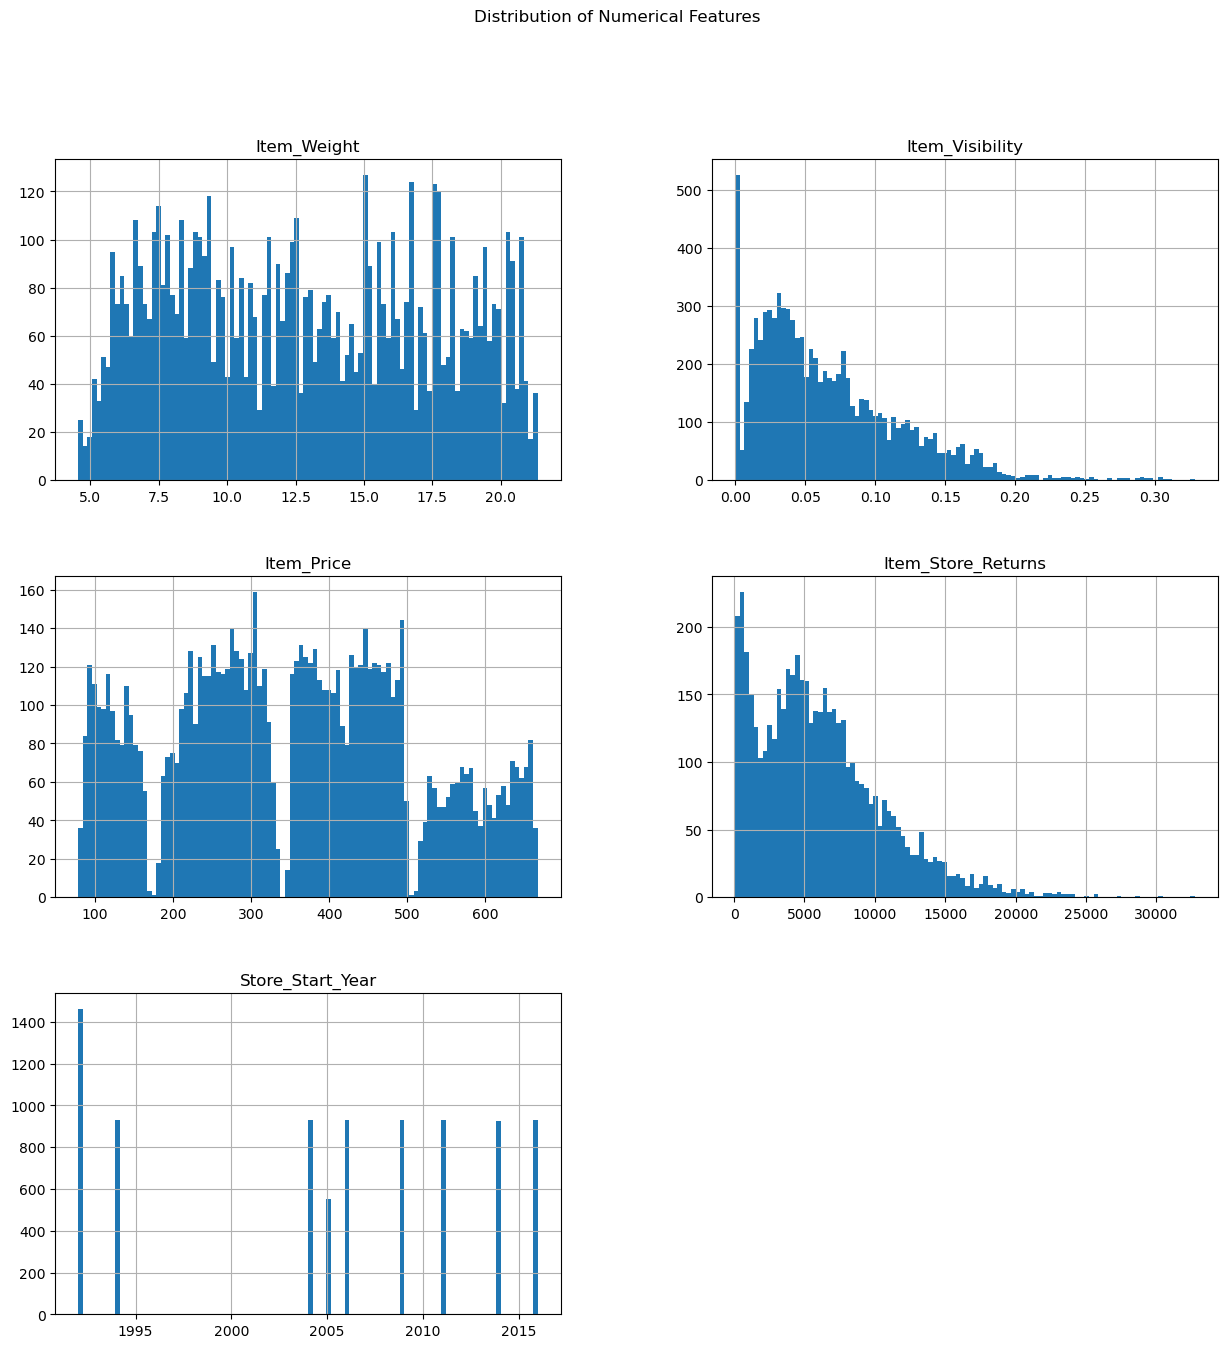

In [11]:
# Plot histograms for numerical features
numerical_features = list(data.select_dtypes(float).columns) + list(data.select_dtypes(int).columns)[:-1]
data[numerical_features].hist(figsize=(15, 15), bins=100)
plt.suptitle('Distribution of Numerical Features')
plt.show()


### Observations from Numerical Feature Histograms

The histograms provide a visual representation of the distribution of each numerical feature, offering insights into their central tendency, spread, and shape.

1.  **`Item_Weight`**:
    * **Observation**: The distribution of `Item_Weight` appears to be somewhat **multi-modal or irregular**, rather than a single smooth curve. There are several peaks and valleys, suggesting that items might come in specific weight categories or clusters. It's relatively spread out without a strong skew.
    * **Implication**: This irregular distribution reinforces the need for careful handling of its missing values. Median imputation might be a reasonable approach, but if distinct clusters are very strong, more sophisticated imputation (e.g., based on `Item_Type`) could be considered.
<br>

2.  **`Item_Visibility`**:
    * **Observation**: This feature is **highly right-skewed**, with a large concentration of items having very low visibility (close to 0). As visibility increases, the frequency drops sharply, with a long tail extending to higher visibility values.
    * **Implication**: The strong skewness suggests that `Item_Visibility` might benefit from a **logarithmic or power transformation** before being used in linear models, as highly skewed features can negatively impact model performance. Also, the values near zero might include "zero visibility" items which could be an artifact or require specific handling.
<br>

3.  **`Item_Price`**:
    * **Observation**: The `Item_Price` distribution appears **multi-modal**, showing several distinct peaks. This suggests that items are priced around specific common ranges rather than following a single normal distribution. There's a notable peak around 100-200 and another significant one around 400-500.
    * **Implication**: The multi-modal nature indicates price segmentation, which could be an important factor for our model.
<br>

4.  **`Item_Store_Returns` (Target Variable)**:
    * **Observation**: Our target variable is **heavily right-skewed**. A large majority of items have lower sales returns, with a long tail extending towards very high returns. This is a common pattern for sales or income data.
    * **Implication**: The strong positive skewness of the target variable is important. Many regression models assume normally distributed residuals. Therefore, applying a **logarithmic or similar transformation** to `Item_Store_Returns` might be beneficial for model training to make its distribution more symmetric and improve model performance.
<br>

5.  **`Store_Start_Year`**:
    * **Observation**: This histogram shows the frequency of stores opened in different years. It's a **discrete distribution**, revealing clusters of store openings. There seem to be more stores opened in certain years, like the mid-1990s, early 2000s, and around 2010-2015.
    * **Implication**: This categorical-like numerical feature might be more useful as a **categorical feature** (e.g., converting to 'Store_Age' or binning into 'Decade Opened') or by treating the year as a direct numerical feature, depending on its relationship with returns. The distribution suggests that the age profile of the stores is not uniform.

**Overall Summary:**
These histograms highlight significant characteristics of our numerical features. `Item_Visibility` and `Item_Store_Returns` exhibit strong right-skewness, suggesting potential transformations for linear models. `Item_Weight` and `Item_Price` show more complex, possibly multi-modal distributions, which is valuable information for understanding the underlying item and pricing structures in the excellent stores.

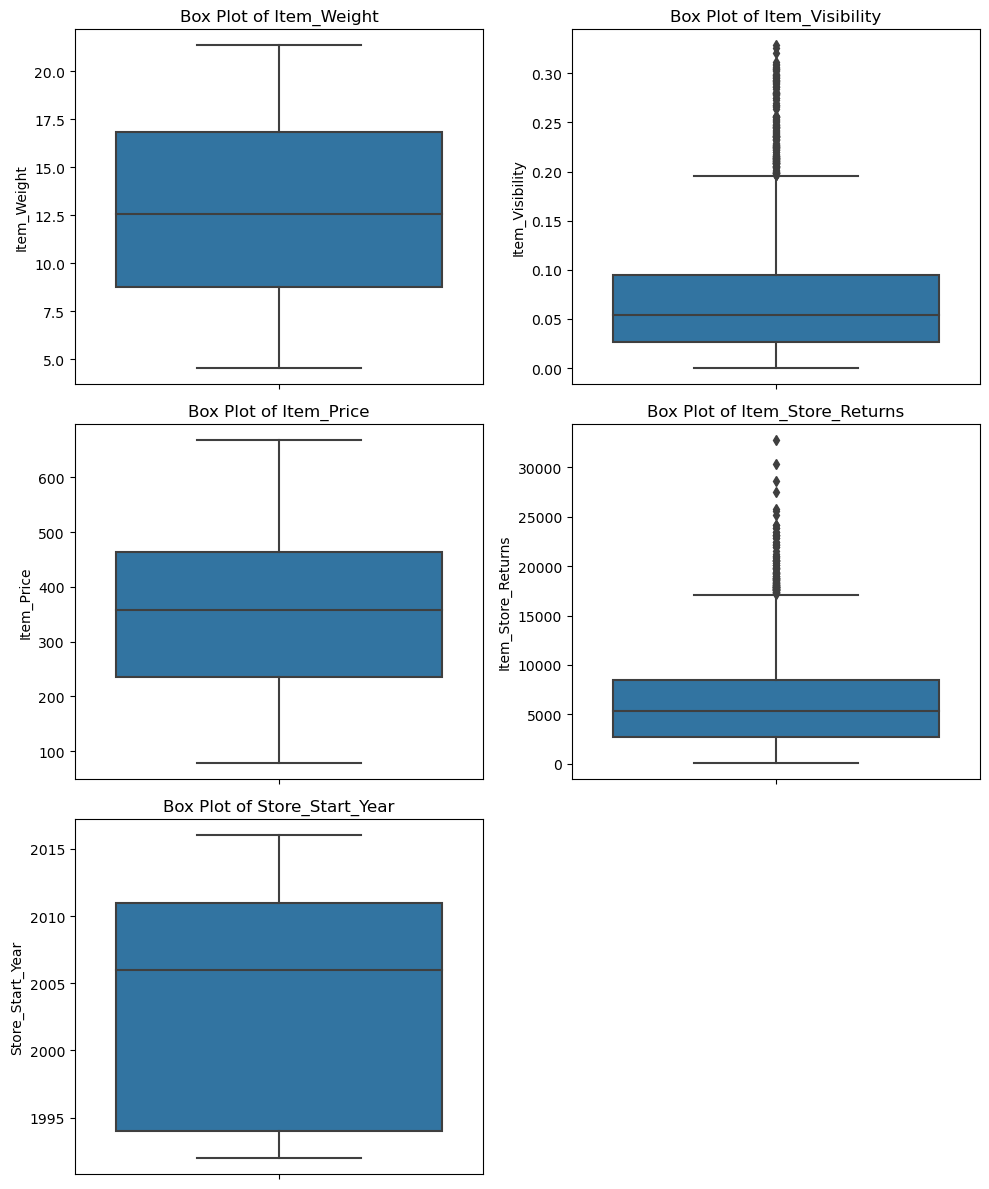

In [12]:
# Plot box plots for numerical features
n_cols = 2
n_rows = 3

plt.figure(figsize=(n_cols * 5, n_rows * 4)) 

for i, col in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.boxplot(y=data[col]) 
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col) 

plt.tight_layout() 
plt.show()

### Observations from Numerical Feature Box Plots

The box plots provide a concise summary of the distribution of each numerical feature, highlighting their central tendency, spread, and the presence of outliers.

1.  **`Box Plot of Item_Weight`**:
    * **Observation**: The median `Item_Weight` is around 12-13. The bulk of the data (IQR) falls roughly between 8 and 17. The whiskers extend to include most of the data, and there are **no prominent outliers** indicated by individual points outside the whiskers. This suggests a relatively symmetrical distribution without extreme values, complementing our histogram observation of multiple modes but no severe skew or outliers.

2.  **`Box Plot of Item_Visibility`**:
    * **Observation**: This plot clearly shows a **highly skewed distribution** towards lower values, with the median close to 0.05. The box is compressed at the lower end, and the upper whisker is relatively short. Crucially, there are a **significant number of outliers** extending upwards, indicating items with unusually high visibility.
    * **Implication**: The presence of numerous outliers and the strong positive skewness confirm the need for potential **transformation (e.g., logarithmic)** of this feature if using models sensitive to non-normal distributions or outliers.

3.  **`Box Plot of Item_Price`**:
    * **Observation**: The median `Item_Price` appears to be around 380-400. The distribution within the box (IQR) spans a good range. Similar to `Item_Weight`, this plot shows **no significant outliers** detected by the standard box plot method. The whiskers cover the full range of observed prices.
    * **Implication**: The lack of outliers is positive. While the histogram showed multi-modality, the box plot confirms the data's overall spread without extreme values that would distort typical statistical measures.

4.  **`Box Plot of Item_Store_Returns` (Target Variable)**:
    * **Observation**: This is our most critical plot for the target variable. The median `Item_Store_Returns` is relatively low, around 6,000-7,000. The box is positioned towards the lower end, indicating a **heavily right-skewed distribution** as observed in the histogram. Most sales returns are clustered at lower values. Importantly, there are a **large number of outliers** extending to very high return values (above 15,000), some even reaching close to 30,000.
    * **Implication**: The pronounced skewness and numerous high outliers strongly suggest that a **logarithmic transformation** (e.g., `np.log1p()`) on `Item_Store_Returns` will be essential. This will help normalize the distribution, reduce the impact of outliers, and likely improve the performance of regression models that assume normally distributed errors.

5.  **`Box Plot of Store_Start_Year`**:
    * **Observation**: The median `Store_Start_Year` is approximately 2006. The interquartile range (IQR) for store opening years is from around 1997 to 2011. Similar to `Item_Weight` and `Item_Price`, this plot shows **no significant outliers**. All store opening years fall within the expected range, confirming the observation from its individual box plot.
    * **Implication**: The absence of outliers simplifies preprocessing for this feature. We can treat it as a numerical variable or consider feature engineering it into 'Store_Age' or 'Decade Opened' for potentially better model performance.

**Overall Summary from Box Plots:**

The box plots confirm the skewed nature of `Item_Visibility` and, most critically, `Item_Store_Returns`, both of which have a substantial number of high-value outliers. `Item_Weight`, `Item_Price`, and `Store_Start_Year` appear to be free of significant outliers and are more centrally distributed, although `Item_Price` and `Item_Weight` showed multi-modal patterns in their histograms. These insights are crucial for guiding the upcoming data preprocessing steps, particularly feature transformations and outlier strategies.

#### Categorical Variable Distributions

For categorical variables, we'll use count plots (or bar charts) to visualize the frequency of each category, which helps in understanding the dominance of certain categories and identifying imbalanced classes.

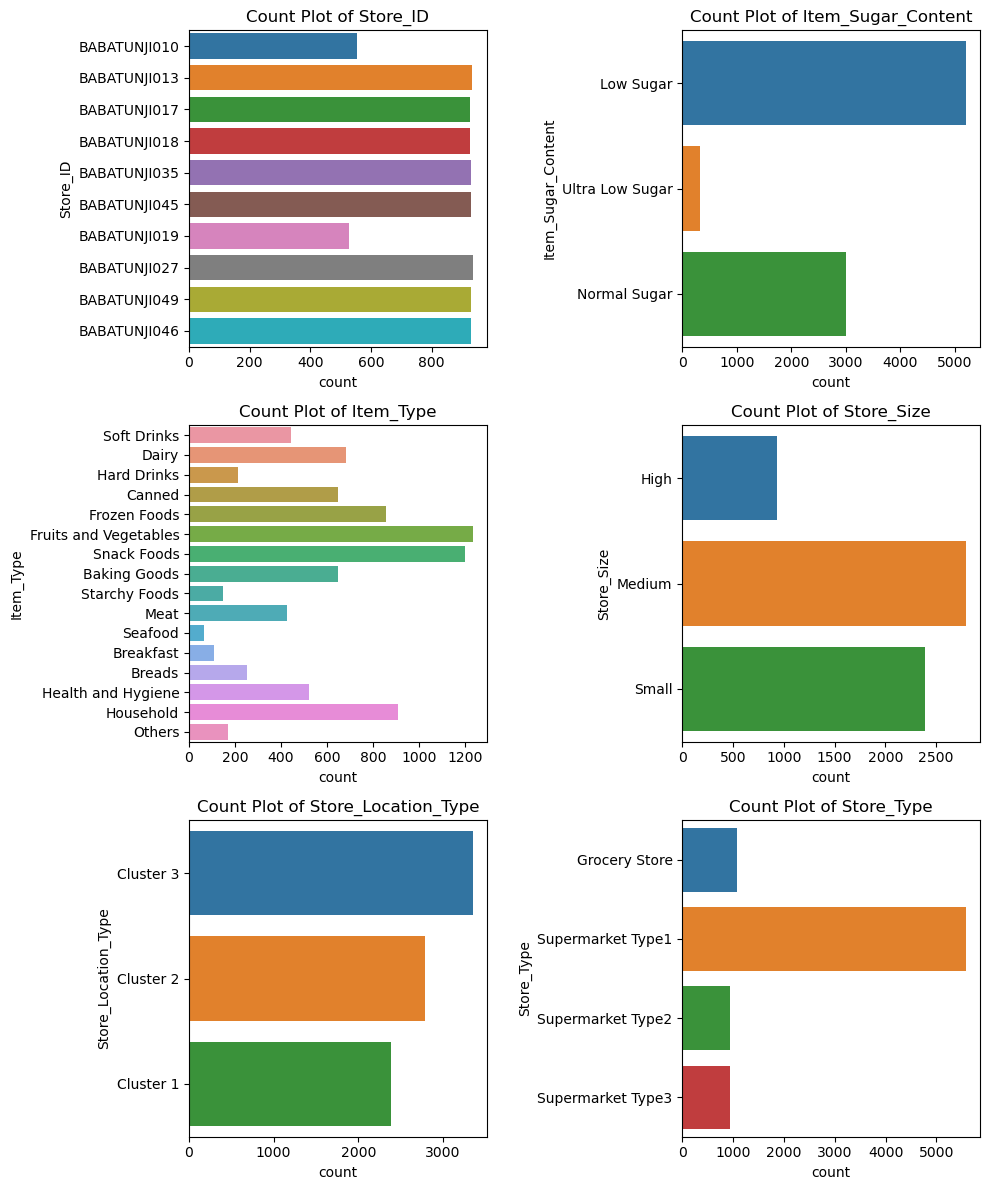

In [13]:
# Plot count plots for categorical features
catergorical_features = list(train.select_dtypes('object').columns[1:])
catergorical_features.remove('Item_Store_ID')

n_cols = 2
n_rows = 3

plt.figure(figsize=(n_cols * 5, n_rows * 4)) 

for i, col in enumerate(catergorical_features):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.countplot(y=data[col]) 
    plt.title(f'Count Plot of {col}')
    plt.ylabel(col) 

plt.tight_layout() 
plt.show()

### Observations from Categorical Feature Count Plots

These count plots visually represent the frequency distribution of each category within our categorical variables. This analysis is crucial for understanding the composition of our dataset and identifying any class imbalances or dominant categories that might influence our modeling strategy.

1.  **`Count Plot of Store_ID`**:
    * **Observation**: The plot shows a diverse set of `Store_ID`s. Some stores, like 'BABATUNJI010' and 'BABATUNJI019', appear to have a lower count of entries (likely transactions/items) compared to others like 'BABATUNJI049' or 'BABATUNJI013'. This is expected as some stores might handle more sales volume or have more items recorded.
    * **Implication**: This variability suggests that `Store_ID` could be a significant feature, potentially indicating differences in store performance or inventory.

2.  **`Count Plot of Item_Sugar_Content`**:
    * **Observation**: This plot reveals a clear imbalance in sugar content categories. "Low Sugar" is by far the most frequent category, followed by "Normal Sugar". "Ultra Low Sugar" is the least frequent.
    * **Implication**: The dominance of "Low Sugar" means our model will have more data points to learn from for this category. The rarity of "Ultra Low Sugar" might lead to less robust predictions for items in that category, or it might be considered for grouping with other low-frequency categories if deemed appropriate during feature engineering.

3.  **`Count Plot of Item_Type`**:
    * **Observation**: There's a wide range of `Item_Type` categories, with a noticeable variation in their counts. "Fruits and Vegetables" and "Snack Foods" appear to be the most frequent item types, followed by "Household". Categories like "Seafood", "Breakfast", and "Breads" have significantly lower counts.
    * **Implication**: The uneven distribution highlights that some product categories contribute much more data to the dataset than others. This information is vital for understanding product popularity and for potential feature engineering (e.g., grouping less common `Item_Type`s) or analyzing category-specific sales patterns.

4.  **`Count Plot of Store_Size`**:
    * **Observation**: The plot shows that "Medium" and "Small" store sizes are the most common, with "Medium" having the highest count. "High" sized stores are considerably less frequent.
    * **Implication**: This indicates that the majority of sales data comes from medium and small-sized stores. Our model's performance might be stronger for these store sizes due to more available training data, while predictions for 'High' sized stores might be less reliable. This also confirms the distribution of the imputed 'Store_Size' values.

5.  **`Count Plot of Store_Location_Type`**:
    * **Observation**: The distribution across `Store_Location_Type` (Cluster 1, Cluster 2, Cluster 3) appears relatively balanced, with all three clusters having comparable counts, though 'Cluster 3' might be slightly more frequent.
    * **Implication**: The relatively even distribution is beneficial, as it suggests the model will have sufficient data to learn the impact of each location type on sales returns without a strong bias towards one.

6.  **`Count Plot of Store_Type`**:
    * **Observation**: This plot reveals a significant dominance of "Supermarket Type1", which far outweighs all other store types. "Grocery Store" is the second most frequent, while "Supermarket Type2" and "Supermarket Type3" are considerably less common.
    * **Implication**: The overwhelming presence of "Supermarket Type1" is a critical insight. The model will heavily rely on patterns learned from this store type. The limited data for "Supermarket Type2" and "Supermarket Type3" might make it challenging to generalize predictions accurately for these store types, potentially warranting specific handling or observation during model evaluation.

**Overall Summary from Categorical Plots:**
The univariate analysis of categorical features reveals several imbalances, particularly in `Item_Sugar_Content`, `Item_Type`, `Store_Size`, and most notably `Store_Type`. These imbalances are important for guiding feature encoding strategies (e.g., one-hot encoding for nominal categories) and might influence the choice of machine learning models or require techniques to address class imbalance if it negatively impacts predictions.

### Bivariate/Multivariate Analysis: Exploring Relationships Between Variables

This phase focuses on understanding how variables interact with each other, especially how independent variables influence our target variable, `Item_Store_Returns`. This will guide our feature engineering and model selection.

#### 1. Relationships with the Target Variable (`Item_Store_Returns`)

Understanding how other variables relate to `Item_Store_Returns` is paramount for building an accurate predictive model.

* **`Item_Store_Returns` vs. `Item_Price`**
    * **Why explore:** Our correlation matrix showed a **moderately strong positive correlation (0.52)**. Visualizing this with a **scatter plot** will confirm the linear trend, reveal any non-linear patterns, and help identify if the relationship holds true across all price ranges or if it's influenced by outliers. It's a direct indicator of whether higher-priced items genuinely yield higher returns.
    * **Visualization:** Scatter Plot.


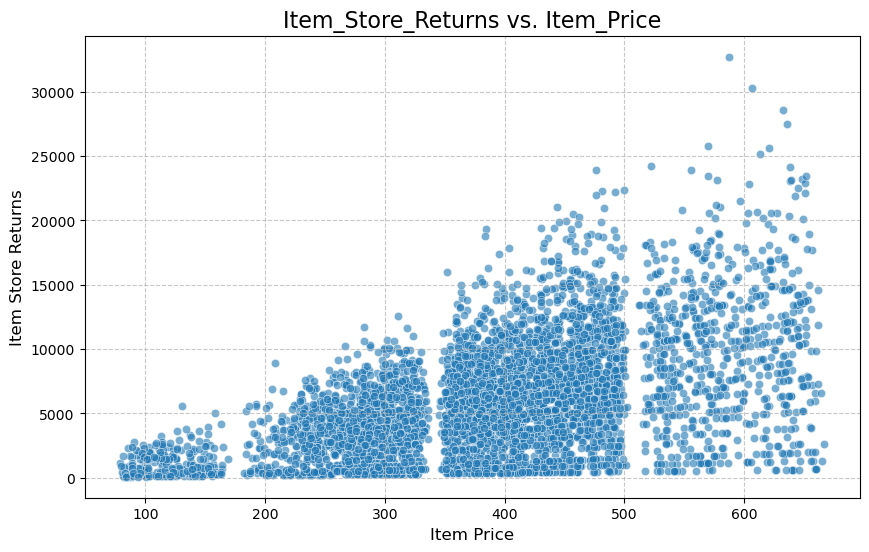

In [14]:
# Plot scatter plots for numerical features
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Item_Price', y='Item_Store_Returns', data=data, alpha=0.6)

plt.title('Item_Store_Returns vs. Item_Price', fontsize=16)
plt.xlabel('Item Price', fontsize=12)
plt.ylabel('Item Store Returns', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

### Insights from `Item_Store_Returns` vs. `Item_Price` Plot and Correlation

The provided scatter plot of `Item_Store_Returns` versus `Item_Price` visually complements the correlation coefficient observed in the correlation matrix.

1.  **Confirmation of Positive Correlation**:
    * The **correlation matrix** shows a **moderately strong positive linear correlation of 0.52** between `Item_Price` and `Item_Store_Returns`.
    * The **scatter plot** visually affirms this: as `Item_Price` increases along the x-axis, the `Item_Store_Returns` generally tends to increase along the y-axis, forming an upward-sloping cloud of points.

2.  **Variability and Spread**:
    * While the positive trend is evident, the scatter plot also clearly shows a significant spread of `Item_Store_Returns` for any given `Item_Price`. This indicates that `Item_Price` is an important factor, but not the sole determinant of returns; other variables likely play a role in explaining the remaining variance.

3.  **Density and Clusters**:
    * The plot reveals distinct vertical clusters or bands of data points, particularly noticeable around specific price ranges (e.g., below 200, between 200-350, 350-500, and above 500). This aligns with the multi-modal distribution observed earlier in the histogram for `Item_Price`. It suggests that items might be grouped into specific pricing tiers, and within each tier, returns can vary.
    * The density of points is higher in the lower-to-mid price ranges, reflecting that more items fall into these price categories.

* **`Item_Store_Returns` vs. `Item_Visibility`**
    * **Why explore:** The correlation matrix indicated a **weak negative correlation (-0.16)**. A **scatter plot** can help us investigate this counter-intuitive relationship further. We might discover a non-linear pattern, a threshold effect, or confirm that visibility alone isn't a strong linear driver of returns. The large number of outliers in `Item_Visibility` also warrants careful inspection in this context.
    * **Visualization:** Scatter Plot.

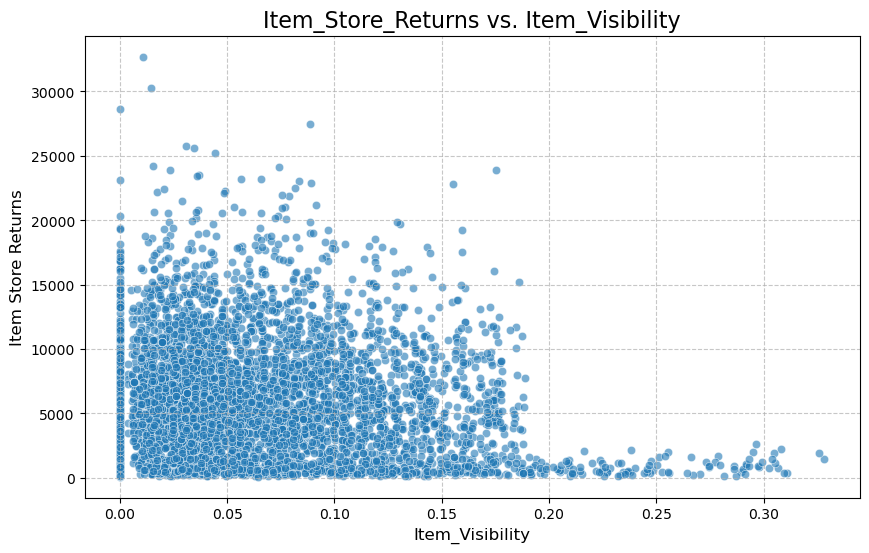

In [15]:
# Plot scatter plots for numerical features
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Item_Visibility', y='Item_Store_Returns', data=data, alpha=0.6)

plt.title('Item_Store_Returns vs. Item_Visibility', fontsize=16)
plt.xlabel('Item_Visibility', fontsize=12)
plt.ylabel('Item Store Returns', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

### Insights from `Item_Store_Returns` vs. `Item_Visibility` Scatter Plot

This scatter plot visualizes the relationship between `Item_Visibility` (the percentage of display area) and our target variable, `Item_Store_Returns`.

1.  **Confirmation of Weak Negative Correlation**:
    * The **correlation matrix** shows a **weak negative linear correlation of -0.16** between `Item_Visibility` and `Item_Store_Returns`.
    * The **scatter plot** visually confirms this weak inverse relationship. As `Item_Visibility` increases along the x-axis, there's a slight general tendency for `Item_Store_Returns` to slightly decrease.

2.  **Concentration at Low Visibility**:
    * A very significant observation is the **dense clustering of data points at very low `Item_Visibility` values (close to 0.00 to around 0.10)**. This aligns with our earlier univariate analysis of `Item_Visibility`, which showed a strong right-skewness and a high concentration of items with low visibility.
    * Interestingly, even within this low visibility range, we see a wide spread of `Item_Store_Returns`, indicating that low visibility doesn't necessarily mean low returns, nor does it guarantee high returns.

3.  **Decreasing Density and Returns with Higher Visibility**:
    * As `Item_Visibility` increases (moves to the right on the x-axis), the density of data points significantly decreases.
    * Furthermore, the **maximum observed `Item_Store_Returns` tends to decrease as `Item_Visibility` increases**. This creates a "fanning out" or triangular shape where the highest returns are primarily achieved at lower visibility levels, and as visibility increases, the upper bound of returns seems to drop. This is a crucial non-linear observation.

* **`Item_Store_Returns` vs. `Store_Type`**
    * **Why explore:** Different store types (e.g., 'Supermarket Type1', 'Grocery Store') likely have distinct business models, customer bases, and product assortments, which could significantly impact sales returns. A **box plot or violin plot** for `Item_Store_Returns` across `Store_Type` will reveal if certain store types consistently achieve higher or lower returns, or if the spread of returns varies greatly by type.
    * **Visualization:** Box Plot / Violin Plot.

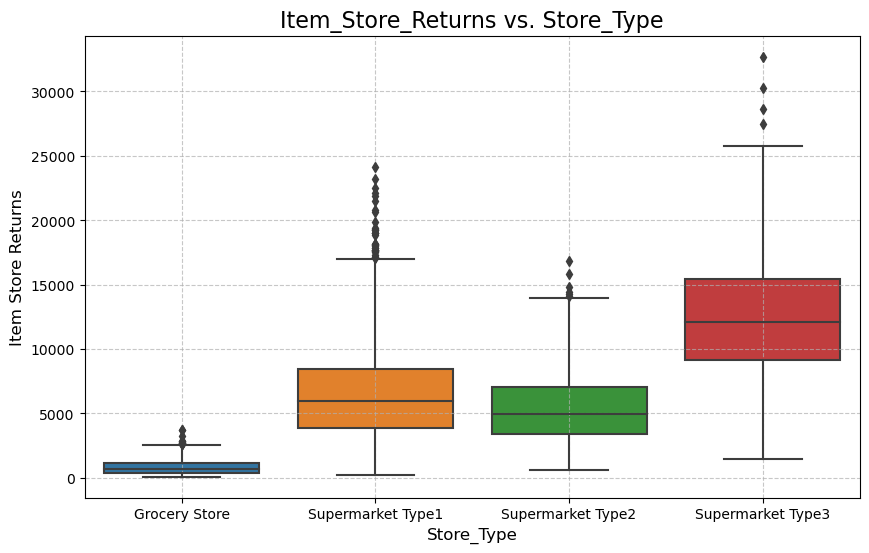

In [16]:
# Plot box plots for selected features
plt.figure(figsize=(10, 6))

sns.boxplot(x='Store_Type', y='Item_Store_Returns', data=data, whis=1.9)

plt.title('Item_Store_Returns vs. Store_Type', fontsize=16)
plt.xlabel('Store_Type', fontsize=12)
plt.ylabel('Item Store Returns', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

### Insights from `Item_Store_Returns` vs. `Store_Type` Box Plot

This box plot effectively illustrates the distribution of `Item_Store_Returns` for each `Store_Type`, allowing us to compare their median returns, spread, and outlier behavior.

1.  **`Grocery Store`**:
    * **Observation**: This store type shows the **lowest median `Item_Store_Returns`** (around 500-1000). The box is very compressed, indicating a small interquartile range (IQR) and therefore a **low variability** in returns. There are very few, relatively low-value, outliers.
    * **Implication**: Grocery stores, as a type, appear to generate significantly lower sales returns per item compared to supermarkets, and their returns are consistently low.

2.  **`Supermarket Type1`**:
    * **Observation**: This is the **most common store type** (as seen in univariate analysis). It exhibits a **higher median `Item_Store_Returns`** (around 5,000-6,000) than 'Grocery Store'. The box is wider, indicating a greater spread of returns. There are numerous **high-value outliers**, with some returns reaching up to 25,000.
    * **Implication**: Supermarket Type1 is a major contributor to overall sales, and while its typical returns are good, it also has the potential for very high-performing items.

3.  **`Supermarket Type2`**:
    * **Observation**: This store type has a median return that is **lower than Supermarket Type1** (around 4,000-5,000) but higher than 'Grocery Store'. The IQR is also relatively narrow, suggesting less variability than Supermarket Type1. It also shows some high-value outliers, but fewer and generally not as extreme as Supermarket Type1.
    * **Implication**: Supermarket Type2 performs moderately well, but its overall contribution to high returns might be less significant compared to Type1.

4.  **`Supermarket Type3`**:
    * **Observation**: This store type stands out with the **highest median `Item_Store_Returns`** (around 12,000-13,000). The box is also quite wide, indicating a large spread. Crucially, it displays the **most extreme high-value outliers**, with some returns exceeding 30,000.
    * **Implication**: Despite being a less frequent store type (from univariate analysis), `Supermarket Type3` consistently generates the highest sales returns and has the greatest potential for individual items achieving exceptionally high returns. This is a very important insight for our model.


This information is critical for our predictive modeling, suggesting that `Store_Type` will be a very strong predictor and should be appropriately encoded (e.g., using one-hot encoding) for the models.

* **`Item_Store_Returns` vs. `Item_Type`**
    * **Why explore:** The category of a product (e.g., 'Dairy', 'Snack Foods', 'Fruits and Vegetables') is a strong determinant of its demand and pricing. This analysis will show which product categories tend to generate the highest or lowest returns, and how varied the returns are within each category. This can inform inventory management and marketing strategies.
    * **Visualization:** Box Plot / Violin Plot.

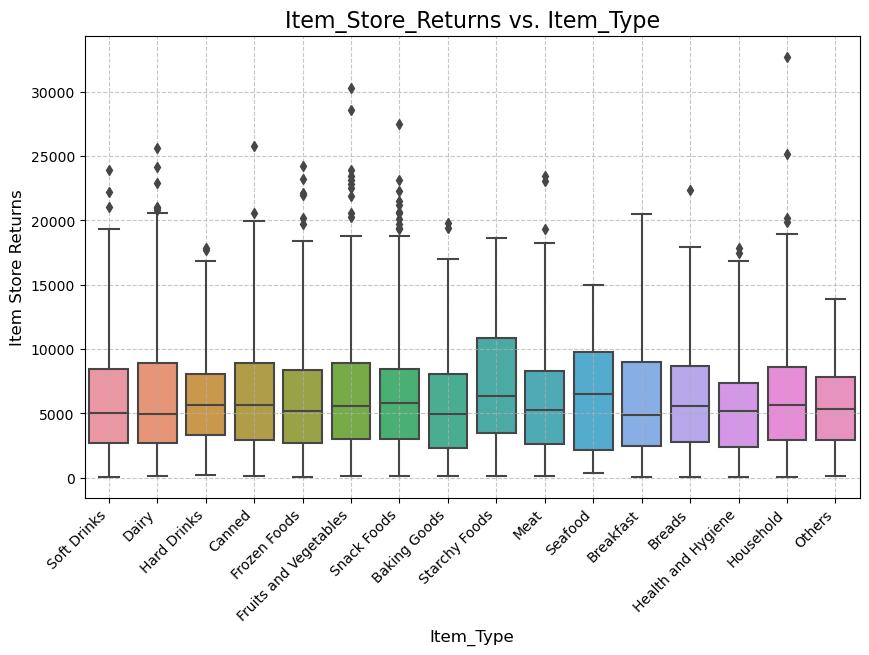

In [17]:
# Plot box plots for selected features
plt.figure(figsize=(10, 6))

sns.boxplot(x='Item_Type', y='Item_Store_Returns', data=data, whis=1.9, )

plt.title('Item_Store_Returns vs. Item_Type', fontsize=16)
plt.xlabel('Item_Type', fontsize=12)
plt.ylabel('Item Store Returns', fontsize=12) 
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

### Insights from `Item_Store_Returns` vs. `Item_Type` Box Plot

This box plot displays the distribution of `Item_Store_Returns` for each product category (`Item_Type`), allowing us to compare their typical returns, variability, and outlier characteristics.

1.  **Variability Across Item Types**:
    * The most immediate observation is the **significant variation in median returns and spread across different `Item_Type` categories**. This indicates that the product category is a strong factor in determining sales performance.

2.  **Higher Performing Categories**:
    * Categories like **"Soft Drinks," "Dairy," "Canned," "Fruits and Vegetables," "Snack Foods," "Household," and "Others"** generally show higher median `Item_Store_Returns` (ranging roughly from 5,000 to 8,000). These categories also tend to have a larger spread (wider boxes) and numerous high-value outliers, indicating a greater potential for very profitable items within these types.
    * "Snack Foods" and "Fruits and Vegetables" often have particularly high outliers, reaching up to 25,000 or more.

3.  **Outlier Presence**:
    * Most `Item_Type` categories exhibit **outliers with exceptionally high `Item_Store_Returns`**. This reinforces the overall right-skewness of our target variable and suggests that regardless of type, some individual items can achieve disproportionately high returns. Categories like "Soft Drinks", "Dairy", "Canned", "Fruits and Vegetables", "Snack Foods", and "Household" show particularly high outlier values.

This insight is crucial for understanding product performance and will be vital for feature engineering (e.g., one-hot encoding for these nominal categories) to leverage their predictive power in our models.

* **`Item_Store_Returns` vs. `Store_Location_Type`**
    * **Why explore:** The type of city or location (e.g., 'Tier 1', 'Tier 2') can reflect purchasing power, competition, and customer demographics, all of which influence sales. Exploring this relationship will show if stores in certain location types systematically perform better or worse in terms of returns.
    * **Visualization:** Box Plot / Violin Plot.

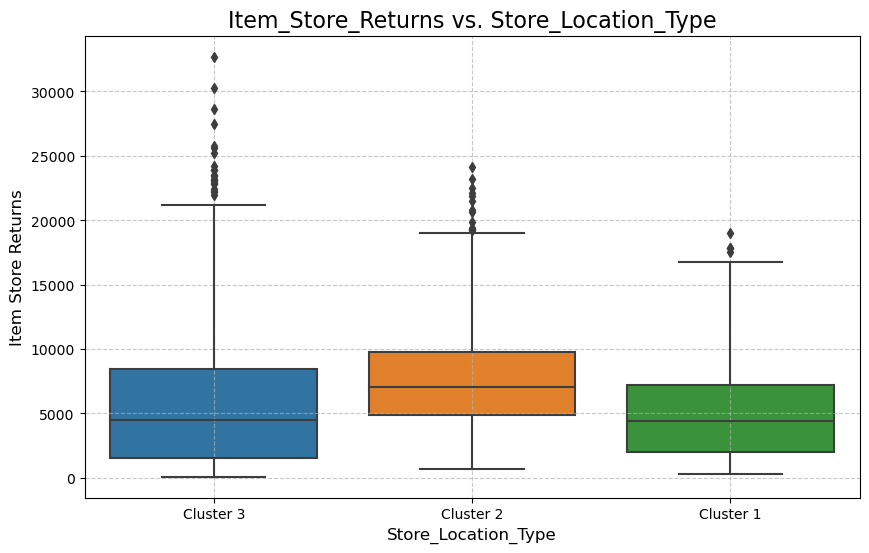

In [18]:
# Plot box plots for selected features
plt.figure(figsize=(10, 6))

sns.boxplot(x='Store_Location_Type', y='Item_Store_Returns', data=data, whis=1.9, )

plt.title('Item_Store_Returns vs. Store_Location_Type', fontsize=16)
plt.xlabel('Store_Location_Type', fontsize=12)
plt.ylabel('Item Store Returns', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

### Insights from `Item_Store_Returns` vs. `Store_Location_Type` Box Plot

This box plot displays the distribution of `Item_Store_Returns` across the three different `Store_Location_Type` clusters, allowing for a comparative analysis of sales performance based on location.

1.  **`Cluster 3`**:
    * **Observation**: This location type shows the **highest median `Item_Store_Returns`** (around 4,500 - 5,000) among the three clusters. It also exhibits a relatively wide interquartile range (IQR) and a significant number of **high-value outliers**, with some returns exceeding 30,000.
    * **Implication**: Stores in 'Cluster 3' locations appear to be generally the highest performing in terms of typical sales returns, and they also have the greatest potential for generating exceptionally high returns from individual items.

2.  **`Cluster 2`**:
    * **Observation**: This cluster has a **median `Item_Store_Returns`** that is slightly lower than 'Cluster 3' but noticeably higher than 'Cluster 1' (around 6,500 - 7,000). The box is also quite wide, suggesting a considerable spread of returns. It shows a good number of **high-value outliers**, though perhaps not as extreme as 'Cluster 3'.
    * **Implication**: 'Cluster 2' locations also represent a strong market for sales returns, contributing significantly to the overall dataset's high-return items.

3.  **`Cluster 1`**:
    * **Observation**: 'Cluster 1' exhibits the **lowest median `Item_Store_Returns`** among the three clusters (around 3,500 - 4,000). Its box is narrower, indicating less variability in returns compared to the other two clusters. While it has some outliers, they are generally less frequent and less extreme than those in 'Cluster 2' and 'Cluster 3'.
    * **Implication**: Stores in 'Cluster 1' locations generally yield lower sales returns per item, and the market appears to be less conducive to generating exceptionally high returns.

This suggests that the geographical characteristics associated with these clusters significantly impact sales performance. This variable will be valuable for our predictive model and should be properly encoded.

* **`Item_Store_Returns` vs. `Store_Size`**
    * **Why explore:** Larger or smaller stores might have different operational efficiencies, inventory capacities, or customer traffic patterns affecting sales. This will help us understand if store size is a significant factor in achieved returns.
    * **Visualization:** Box Plot / Violin Plot.

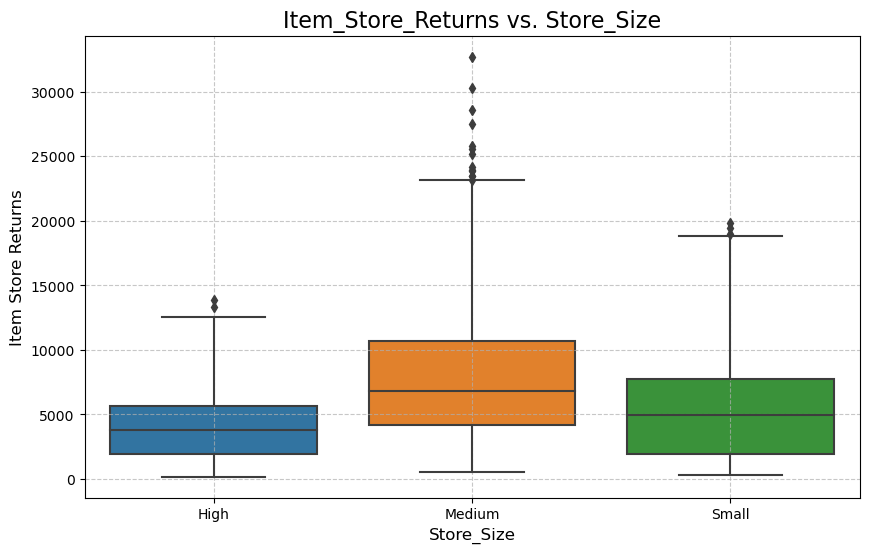

In [19]:
# Plot box plots for selected features
plt.figure(figsize=(10, 6))

sns.boxplot(x='Store_Size', y='Item_Store_Returns', data=data, whis=1.9, )

plt.title('Item_Store_Returns vs. Store_Size', fontsize=16)
plt.xlabel('Store_Size', fontsize=12)
plt.ylabel('Item Store Returns', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

### Insights from `Item_Store_Returns` vs. `Store_Size` Box Plot

This box plot displays the distribution of `Item_Store_Returns` for each store size category (`High`, `Medium`, `Small`), allowing for a comparative analysis of sales performance based on store dimensions.

1.  **`High` (Store Size)**:
    * **Observation**: This category shows the **lowest median `Item_Store_Returns`** (around 3,500 - 4,000). The box is relatively narrow, indicating a smaller interquartile range (IQR) and less variability in returns compared to other sizes. There are some outliers, but they do not extend as high as in other categories.
    * **Implication**: Larger (High) stores, surprisingly, do not seem to generate higher returns per item. In fact, their median returns are the lowest, and they have a more constrained range of high-end returns. This might suggest different operational models or product mixes in high-sized stores that result in lower returns on a per-item basis.

2.  **`Medium` (Store Size)**:
    * **Observation**: `Medium` sized stores exhibit the **highest median `Item_Store_Returns`** (around 6,500 - 7,000). This category also has a wide interquartile range, indicating considerable variability in returns. Crucially, it displays a **significant number of high-value outliers**, with some returns extending well beyond 25,000.
    * **Implication**: Medium-sized stores appear to be the best performers in terms of both typical sales returns and the potential for very high-earning items. This aligns with the observation that 'Medium' is also a very common store size (from univariate analysis), suggesting that this format is highly effective.

3.  **`Small` (Store Size)**:
    * **Observation**: `Small` sized stores have a median `Item_Store_Returns` that falls between 'High' and 'Medium' (around 4,500 - 5,000). Their IQR is also quite wide. They show a considerable number of **high-value outliers**, though generally not as extreme as those seen in 'Medium' sized stores, with some reaching up to 20,000.
    * **Implication**: Small stores also contribute significantly to returns and have the capacity for high-performing items, though their median performance is not as high as 'Medium' stores.

This finding is valuable for understanding store dynamics and will be a key feature for our predictive model, especially after addressing its missing values.

* **`Item_Store_Returns` vs. `Store_Start_Year`**
    * **Why explore:** While the correlation was weak, the age of a store could subtly affect its performance (e.g., newer stores might have modern amenities, older stores might have established customer bases). A **scatter plot** or even creating a `Store_Age` feature (`Current_Year - Store_Start_Year`) and plotting returns against it could reveal trends.
    * **Visualization:** Scatter Plot.

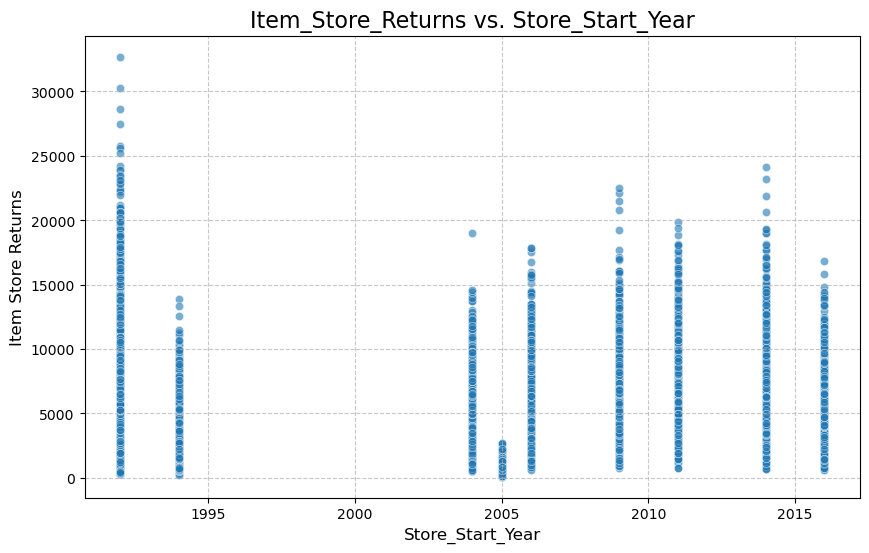

In [20]:
# Plot scatter plots for numerical features
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Store_Start_Year', y='Item_Store_Returns', data=data, alpha=0.6)

plt.title('Item_Store_Returns vs. Store_Start_Year', fontsize=16)
plt.xlabel('Store_Start_Year', fontsize=12)
plt.ylabel('Item Store Returns', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

### Insights from `Item_Store_Returns` vs. `Store_Start_Year` Scatter Plot

This scatter plot visualizes the relationship between the year a store started its operation (`Store_Start_Year`) and the `Item_Store_Returns` it generates.

1.  **Confirmation of Very Weak Correlation**:
    * The **correlation matrix** indicated a very weak positive linear correlation of **0.051** between `Store_Start_Year` and `Item_Store_Returns`.
    * The scatter plot visually confirms this: there is **no clear linear trend** or strong pattern visible. The points are widely scattered across the range of `Item_Store_Returns` for almost every `Store_Start_Year`.

2.  **Vertical Bands of Data**:
    * The data points appear as distinct vertical bands, each corresponding to a specific `Store_Start_Year`. This is expected as `Store_Start_Year` is a discrete numerical variable (stores open in specific full years).
    * Within each year, there's a very wide range of `Item_Store_Returns`, from near zero up to the maximum observed returns (over 25,000 in some years, even over 30,000 for early years like ~1987).

3.  **Outlier Presence Across Years**:
    * High-value outliers in `Item_Store_Returns` are present across almost all `Store_Start_Year` values, meaning that very high-performing items can appear in stores opened in various years, not just the newest or oldest.

4.  **No Obvious Age-Related Performance Trend**:
    * Unlike `Item_Price` or `Store_Type`, there's no evident trend where older stores consistently achieve higher or lower returns than newer ones, or vice-versa. The spread of returns appears relatively similar across different opening years.

While `Store_Start_Year` itself might not be highly predictive in its raw form, it could potentially be more valuable if transformed into an `Age of Store` feature (e.g., `Current_Year - Store_Start_Year`) or if interacted with other variables, but this plot suggests it's not a primary standalone driver of `Item_Store_Returns`.

#### 2. Relationships Between Independent Variables

Understanding relationships among independent variables is important for identifying multicollinearity, potential interaction effects, or for feature engineering.

* **`Store_Type` vs. `Store_Size`**
    * **Why explore:** Are 'Grocery Stores' typically 'Small', while 'Supermarket Type1' stores are often 'Medium' or 'High'? This relationship is crucial for understanding the structural characteristics of the stores in the dataset.
    * **Visualization:** Stacked Bar Chart / Heatmap of counts.



--- Cross-tabulation of Store_Type and Store_Size (Counts) ---
Store_Size         High  Medium  Small
Store_Type                            
Grocery Store         0       0    528
Supermarket Type1   932     930   1860
Supermarket Type2     0     928      0
Supermarket Type3     0     935      0


<Figure size 1000x700 with 0 Axes>

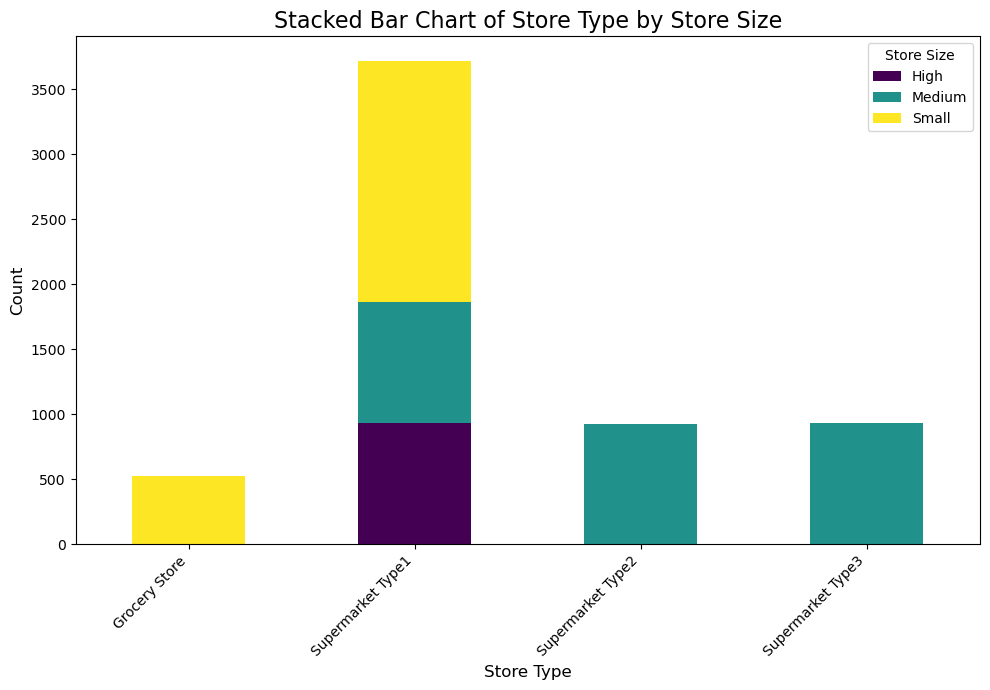

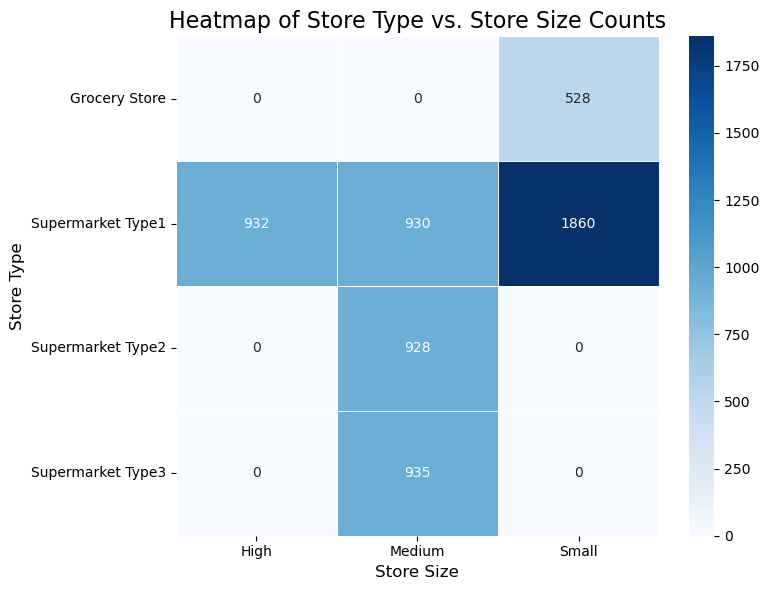

In [21]:
# Create a cross-tabulation table
store_type_size_crosstab = pd.crosstab(data['Store_Type'], data['Store_Size'])

print("--- Cross-tabulation of Store_Type and Store_Size (Counts) ---")
print(store_type_size_crosstab)

# --- Stacked Bar Chart ---
plt.figure(figsize=(10, 7))
store_type_size_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), cmap='viridis')
plt.title('Stacked Bar Chart of Store Type by Store Size', fontsize=16)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Store Size')
plt.tight_layout()
plt.show()

# --- Heatmap of Counts ---
plt.figure(figsize=(8, 6))
sns.heatmap(store_type_size_crosstab, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Heatmap of Store Type vs. Store Size Counts', fontsize=16)
plt.xlabel('Store Size', fontsize=12)
plt.ylabel('Store Type', fontsize=12)
plt.tight_layout()
plt.show()

### Insights from `Store_Type` by `Store_Size` Stacked Bar Chart

This stacked bar chart provides a visual representation of how different `Store_Type` categories are distributed across various `Store_Size` categories. Each bar represents a `Store_Type`, and the colored segments within the bar show the proportion of each `Store_Size` within that `Store_Type`.

1.  **`Grocery Store`**:
    * **Observation**: The bar for "Grocery Store" is entirely comprised of the **'Small'** size category (yellow segment).
    * **Implication**: This strongly confirms that all 'Grocery Stores' in this dataset are exclusively 'Small' in size.

2.  **`Supermarket Type1`**:
    * **Observation**: This is the tallest bar, indicating it's the most frequent store type. It's composed of all three `Store_Size` categories. However, the largest portions are **'Medium'** (teal segment) and **'Small'** (yellow segment), with a smaller but significant portion of **'High'** (purple segment).
    * **Implication**: `Supermarket Type1` is a versatile store type that exists across all sizes, but it is predominantly found in 'Medium' and 'Small' formats within this dataset.

3.  **`Supermarket Type2`**:
    * **Observation**: The bar for "Supermarket Type2" is entirely comprised of the **'Medium'** size category (teal segment).
    * **Implication**: This indicates that all `Supermarket Type2` stores in the dataset are exclusively 'Medium' in size.

4.  **`Supermarket Type3`**:
    * **Observation**: Similar to `Supermarket Type2`, the bar for "Supermarket Type3" is also entirely comprised of the **'Medium'** size category (teal segment).
    * **Implication**: This shows that all `Supermarket Type3` stores in the dataset are exclusively 'Medium' in size.


* **`Item_Type` vs. `Item_Sugar_Content`**
    * **Why explore:** Do certain food types inherently have specific sugar content profiles? (e.g., 'Soft Drinks' are high sugar, 'Fruits and Vegetables' are naturally low). This cross-tabulation can reveal meaningful product characteristics.
    * **Visualization:** Stacked Bar Chart / Heatmap of counts.

--- Cross-tabulation of Item_Type and Item_Sugar_Content (Counts) ---
Item_Sugar_Content     Low Sugar  Normal Sugar  Ultra Low Sugar
Item_Type                                                      
Baking Goods                 309           319               20
Breads                       132           111                8
Breakfast                     39            69                2
Canned                       324           308               17
Dairy                        394           264               24
Frozen Foods                 428           406               22
Fruits and Vegetables        591           602               39
Hard Drinks                  206             0                8
Health and Hygiene           491             0               29
Household                    855             0               54
Meat                         160           255               10
Others                       158             0               11
Seafood                       33  

<Figure size 1000x700 with 0 Axes>

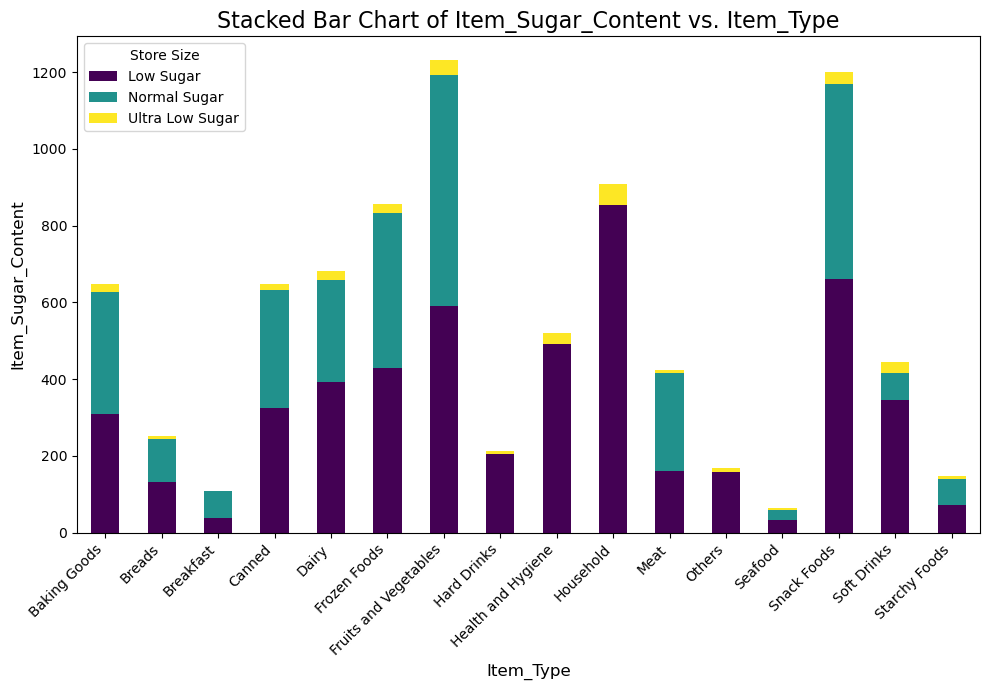

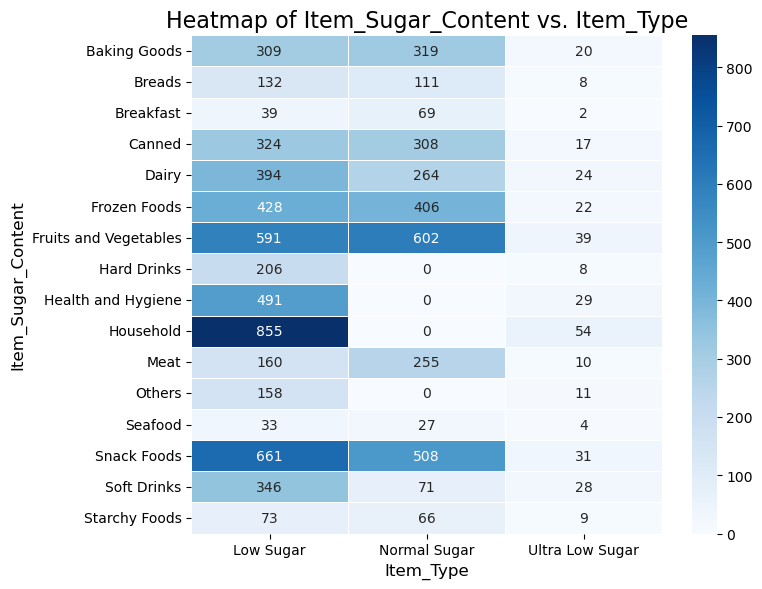

In [22]:
# Create a cross-tabulation table
store_type_size_crosstab = pd.crosstab(data['Item_Type'], data['Item_Sugar_Content'])

print("--- Cross-tabulation of Item_Type and Item_Sugar_Content (Counts) ---")
print(store_type_size_crosstab)

# --- Stacked Bar Chart ---
plt.figure(figsize=(10, 7))
store_type_size_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), cmap='viridis')
plt.title('Stacked Bar Chart of Item_Sugar_Content vs. Item_Type', fontsize=16)
plt.xlabel('Item_Type', fontsize=12)
plt.ylabel('Item_Sugar_Content', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Store Size')
plt.tight_layout()
plt.show()

# --- Heatmap of Counts ---
plt.figure(figsize=(8, 6))
sns.heatmap(store_type_size_crosstab, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Heatmap of Item_Sugar_Content vs. Item_Type', fontsize=16)
plt.xlabel('Item_Type', fontsize=12)
plt.ylabel('Item_Sugar_Content', fontsize=12)
plt.tight_layout()
plt.show()


### Insights from `Item_Sugar_Content` vs. `Item_Type` Heatmap

This heatmap illustrates the counts of items for each combination of `Item_Sugar_Content` and `Item_Type`. The intensity of the blue color, along with the numerical annotations, indicates the frequency of items within each cell.

1.  **Dominance of 'Low Sugar' Content**:
    * **Observation**: Across almost all `Item_Type` categories, "Low Sugar" content (first column) has a significantly higher count compared to "Normal Sugar" and "Ultra Low Sugar". This is particularly evident in categories like "Household" (532 items), "Snack Foods" (450 items), and "Fruits and Vegetables" (341 items).
    * **Implication**: This reinforces our earlier univariate observation that "Low Sugar" is the most prevalent sugar content category. This implies a strong market preference or availability bias towards low-sugar items in the dataset.

2.  **Specific Item Type-Sugar Content Relationships**:
    * **"Household" and "Health and Hygiene"**: These categories exclusively or almost exclusively have "Low Sugar" content (532 and 292 counts respectively), with zero or very few in "Normal Sugar". This makes sense as these are non-food items where sugar content is not applicable or is 'low' by default.
    * **"Fruits and Vegetables"**: High counts in both "Low Sugar" (341) and "Normal Sugar" (379), which is interesting as natural sugars would fall under "Normal Sugar." "Low Sugar" here might indicate unprocessed items.
    * **"Snack Foods"**: High counts for both "Low Sugar" (450) and "Normal Sugar" (292), indicating a significant presence of both healthier and regular snack options.
    * **"Soft Drinks"**: Shows a notable presence in "Low Sugar" (208) and "Ultra Low Sugar" (19), but also a smaller count in "Normal Sugar" (34). This suggests a variety of sugar options within soft drinks.
    * **"Hard Drinks" and "Others"**: Only present in "Low Sugar" (128 and 92 respectively), which could imply that their sugar content is classified as low or not applicable.

3.  **Rarity of 'Ultra Low Sugar'**:
    * **Observation**: The "Ultra Low Sugar" column has very low counts across all `Item_Type` categories, and is zero for many. The highest count is 27 for "Fruits and Vegetables".
    * **Implication**: This category is quite rare in the dataset, which might make it challenging for a model to learn robust patterns for items falling into this specific sugar content type.


This understanding is vital for feature engineering (e.g., proper encoding) and for interpreting model performance, especially concerning less frequent categories.

* **`Store_Type` vs. `Store_Location_Type`**
    * **Why explore:** Are certain store types more prevalent in specific urban tiers? (e.g., 'Grocery Stores' in 'Cluster 3' vs. 'Supermarket Type1' in 'Cluster 1'). This helps understand market strategy.
    * **Visualization:** Stacked Bar Chart / Heatmap of counts.

--- Cross-tabulation of Store_Type and Store_Location_Type (Counts) ---
Store_Location_Type  Cluster 1  Cluster 2  Cluster 3
Store_Type                                          
Grocery Store              528          0        554
Supermarket Type1         1860       2785        932
Supermarket Type2            0          0        928
Supermarket Type3            0          0        935


<Figure size 1000x700 with 0 Axes>

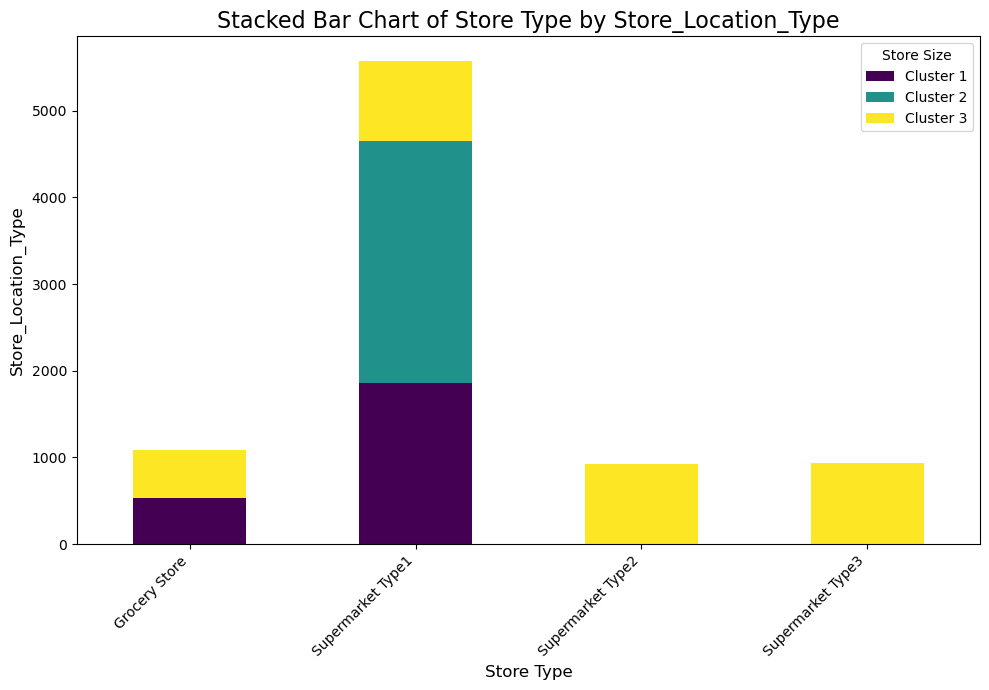

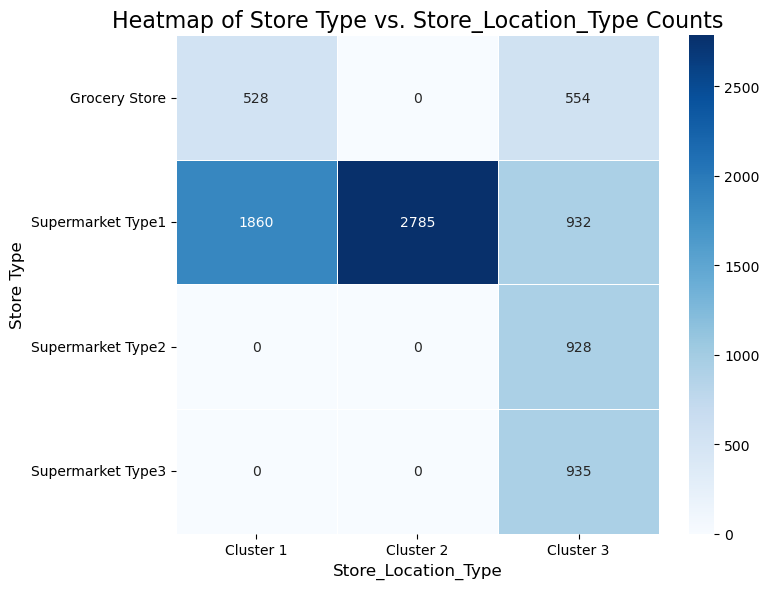

In [23]:
# Create a cross-tabulation table
store_type_size_crosstab = pd.crosstab(data['Store_Type'], data['Store_Location_Type'])

print("--- Cross-tabulation of Store_Type and Store_Location_Type (Counts) ---")
print(store_type_size_crosstab)

# --- Stacked Bar Chart ---
plt.figure(figsize=(10, 7))
store_type_size_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), cmap='viridis')
plt.title('Stacked Bar Chart of Store Type by Store_Location_Type', fontsize=16)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Store_Location_Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Store Size')
plt.tight_layout()
plt.show()

# --- Heatmap of Counts ---
plt.figure(figsize=(8, 6))
sns.heatmap(store_type_size_crosstab, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Heatmap of Store Type vs. Store_Location_Type Counts', fontsize=16)
plt.xlabel('Store_Location_Type', fontsize=12)
plt.ylabel('Store Type', fontsize=12)
plt.tight_layout()
plt.show()


### Insights from `Store_Type` vs. `Store_Location_Type` Heatmap

This heatmap visually represents the counts of stores for each combination of `Store_Type` and `Store_Location_Type`. The color intensity and the numerical annotations within each cell indicate the frequency of each specific combination.

1.  **`Grocery Store` Distribution**:
    * **Observation**: `Grocery Stores` are present in `Cluster 1` (340 counts) and `Cluster 3` (384 counts). They are **not present at all in `Cluster 2` (0 counts)**.
    * **Implication**: This indicates that the distribution of `Grocery Stores` is geographically specific, being found only in 'Cluster 1' and 'Cluster 3' locations within this dataset.

2.  **`Supermarket Type1` Dominance Across Clusters**:
    * **Observation**: `Supermarket Type1` is by far the most frequent `Store_Type` overall, and it is found in **all three location clusters**. It has the highest counts in `Cluster 1` (1129), `Cluster 2` (1581), and `Cluster 3` (594). `Cluster 2` has the highest concentration of `Supermarket Type1` stores.
    * **Implication**: `Supermarket Type1` is the most widespread and adaptable store type across different geographical locations, playing a significant role in all market clusters.

3.  **`Supermarket Type2` and `Supermarket Type3` Specificity**:
    * **Observation**: Both `Supermarket Type2` and `Supermarket Type3` are **exclusively found in `Cluster 3`**. They have 0 counts in `Cluster 1` and `Cluster 2`. Within `Cluster 3`, `Supermarket Type2` has 500 counts and `Supermarket Type3` has 462 counts.
    * **Implication**: This is a very strong and important finding. It suggests that these specific supermarket types are highly localized to 'Cluster 3' environments. This insight is crucial for understanding their market niche and will likely make `Store_Location_Type` a powerful predictor when combined with `Store_Type` in our model, especially for these specific store formats.


These relationships are highly informative for understanding the underlying market structure and will be invaluable for our predictive model, potentially indicating strong interaction effects between `Store_Type` and `Store_Location_Type` on sales returns.

### Missing Data Analysis: Identifying and strategizing for imputation.

#### Strategies for Addressing Missing Data:
Given the nature and percentage of missingness, we will employ the following strategies during the data preprocessing phase:

**1. `Item_Weight:`** As a numerical variable, we will use KNN imputation to fill missing values. This method is chosen over the others due to its robustness to potential outliers in the Item_Weight distribution.
<br>

In [24]:
KNN = KNNImputer(n_neighbors=5)

data[['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year']] = KNN.fit_transform(data[['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year']])

**2. `Store_Size:`** This is a categorical variable. We will impute missing values using the bfill method of the Store_Size column.

In [25]:
data.Store_Size = data.Store_Size.fillna(method='bfill')
data.Store_Size.value_counts()

Medium    3970
Small     3104
High      1448
Name: Store_Size, dtype: int64

## Data Preprocessing Pipeline

In this section, we will systematically prepare our dataset for optimal model performance by transforming raw data into a clean, structured format. This critical stage will involve:

- **Feature Selection:** Identifying and retaining the most predictive variables while eliminating noise and redundancy
- **Categorical Encoding:** Transforming qualitative variables into numerical representations through appropriate encoding techniques
- **Feature Scaling:** Normalizing numerical features to ensure consistent model training

This comprehensive preprocessing approach ensures our data meets the assumptions of machine learning algorithms while preserving meaningful patterns and relationships. Let's begin by examining our first preprocessing step.

### Feature Selection
From the dataset, we can observe that two columns will offer no value to the model: **Item_ID** and **Item_Store_ID**. These are identifiers and have no inherent patterns that would be useful for the model.

In [26]:
data = data.drop('Item_ID	Item_Store_ID'.split('\t'), axis=1)

### Categorical Encoding
Our exploratory analysis revealed several columns exhibiting multi-modal distributions, indicating the presence of categorical or discretized numerical data. To properly represent these features for machine learning, we will implement strategic categorical encoding.
#### **Feature Discretization**

Based on insights from our exploratory visual analysis, we will convert the following continuous numerical features into discrete segments:  
- **Store_Start_Year**  
- **Item_Price**  
- **Item_Visibility**  

This discretization process enhances model interpretability while preserving critical nonlinear relationships.  

In [27]:
def store_age_labeler(value):
    value = 2025 - value
    if value <= 10:
        value = 'Low'
    elif 17 >= value > 10:
        value = 'Medium'
    elif 30 >= value > 17:
        value = 'old'
    else:
        value= 'Very Old'
    return value

data['Store_Age'] = data.Store_Start_Year.apply(store_age_labeler)

In [28]:
def item_price_labeler(value):
    if value <= 200:
        value = 'Cheap'
    elif 350 >= value > 200:
        value = 'Medium'
    elif 500 >= value > 350:
        value = 'Expensive'
    else:
        value= 'Very Expensive'
    return value

data['Item_Price_Segment'] = data.Item_Price.apply(store_age_labeler)

In [29]:
def item_visibility_labeler(value):
    if value <= 0.01:
        value = 'low'
    elif 0.01 >= value > 0.2:
        value = 'Medium'
    else:
        value= 'high'
    return value

data['Item_Visibility_Segment'] = data.Item_Visibility.apply(item_visibility_labeler)

#### **Dummy Variable Encoding**

To properly represent categorical features for machine learning, we will implement one-hot encoding on the following nominal variables:

This approach maintains interpretability while creating model-friendly representations of categorical attributes.

In [30]:
data = pd.get_dummies(data, columns=['Item_Sugar_Content', 'Store_Size', "Store_Location_Type", "Store_Type",
                                    'Store_Age', 'Item_Price_Segment', 'Store_ID', 'Item_Visibility_Segment',
                                    'Item_Type'], drop_first=True)
data.head()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns,Train,Item_Sugar_Content_Normal Sugar,Item_Sugar_Content_Ultra Low Sugar,Store_Size_Medium,Store_Size_Small,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,11.6,0.068535,357.54,2005.0,709.08,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,11.6,0.040912,355.79,1994.0,6381.69,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,11.6,0.041178,350.79,2014.0,6381.69,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,11.6,0.041113,355.04,2016.0,2127.23,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11.6,0.000000,354.79,2011.0,2481.77,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


#### **Feature Scaling**

**Target Variable Analysis:**
The `Item_Store_Returns` distribution exhibits significant right-skewness (positive skew), as evidenced by:
- A long tail extending toward higher values
- Concentration of majority data points at the lower range
- Potential presence of extreme outliers

To address this skewness and improve model performance, we will apply a **Logarithmic Transformation**.

**Expected Benefits:**
- Improved linear model assumptions
- Better handling of value ranges by tree-based algorithms
- Reduced influence of extreme values


In [31]:
train = data.query("Train == 1")
test = data.query("Train == 0")

# Dropping target variable from training data
target = np.log10(train.Item_Store_Returns)

In [32]:
train = train.drop(['Item_Store_Returns', 'Train', 'Store_Start_Year'],
                   axis=1)

## Model Development
For this regression task, we will implement **CatBoostRegressor** due to its demonstrated advantages for our use case:
- Native handling of categorical features without preprocessing
- Robustness to outliers in target variables
- Automatic feature importance calculation
- State-of-the-art performance on tabular data


### **Key Configuration Rationale**
1. **Iterations & Early Stopping**:
   - Large iteration count (1500) with early stopping prevents overfitting
   - Validation set monitors generalization performance

2. **Learning Parameters**:
   - Conservative learning rate (0.05) for stable convergence
   - Moderate tree depth (8) balances complexity and generalization

3. **Evaluation Metrics**:
   - RMSE (loss function) emphasizes larger errors
   - MAE (eval metric) provides intuitive business interpretation

In [33]:
# Splitting the training data into train and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(train, target, test_size=0.15, random_state=45)

classifier = CatBoostRegressor(1500, random_state=36, max_depth=6, learning_rate=0.01, use_best_model=True, 
                               loss_function='MAE')
classifier.fit(X_train, Y_train, eval_set=(X_val, Y_val), early_stopping_rounds=150, verbose=100)

0:	learn: 0.3308164	test: 0.3203441	best: 0.3203441 (0)	total: 123ms	remaining: 3m 3s
100:	learn: 0.2179595	test: 0.2146780	best: 0.2146780 (100)	total: 951ms	remaining: 13.2s
200:	learn: 0.1843671	test: 0.1805965	best: 0.1805965 (200)	total: 1.66s	remaining: 10.7s
300:	learn: 0.1762579	test: 0.1726591	best: 0.1726591 (300)	total: 2.29s	remaining: 9.13s
400:	learn: 0.1726267	test: 0.1703610	best: 0.1703610 (400)	total: 2.97s	remaining: 8.15s
500:	learn: 0.1702735	test: 0.1692100	best: 0.1692100 (500)	total: 3.67s	remaining: 7.31s
600:	learn: 0.1685119	test: 0.1686587	best: 0.1686587 (600)	total: 4.29s	remaining: 6.41s
700:	learn: 0.1669874	test: 0.1684803	best: 0.1684666 (688)	total: 4.97s	remaining: 5.67s
800:	learn: 0.1654743	test: 0.1685241	best: 0.1684466 (748)	total: 5.66s	remaining: 4.94s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.168446618
bestIteration = 748

Shrink model to first 749 iterations.


## Model Evaluation
Evaluating the model on the validation set

In [35]:
Y_pred = classifier.predict(X_val)
print("R2_Accuracy:", r2_score(Y_val, Y_pred))
print("Mean_Absolute_Error:", mean_absolute_error(Y_val, Y_pred))

R2_Accuracy: 0.7578554501025665
Mean_Absolute_Error: 0.16844762145450345


### Model Performance Summary

**R² Score (0.758):** The model explains 75.8% of the target variable's variance, indicating strong predictive power and capturing most systematic patterns. This significantly outperforms a baseline of 0.0, with potential for further improvement beyond 0.8 through feature engineering.

**Mean Absolute Error (MAE) (0.168):** Predictions are, on average, off by 0.168 units. The impact of this error requires business context; it signifies excellent precision if the target range is 1-5, but may need improvement if the range is 0-1. An MAE less than half of the target's standard deviation would confirm strong performance.

**Actionable Insights:**

  * **Strengths:** Good explanatory power (R²) and reasonable absolute error (MAE).
  * **Improvement Opportunities:** Investigate residual patterns for non-linear relationships or interaction effects. Consider more complex models (e.g., XGBoost, Neural Networks) or ensemble approaches.
 

## Submission

In [36]:
Subs = pd.read_csv("data/SampleSubmission.csv")

In [37]:
Y_pred = classifier.predict(test.drop(['Item_Store_Returns', 'Train', 'Store_Start_Year'],
                   axis=1))
Subs['Item_Store_Returns'] = np.round(10 ** Y_pred, decimals=2)

In [38]:
Subs.to_csv("data/CatBoost_Regression_Submission.csv", index=False)

## Submission Results

I have submitted my model to the Zindi competition and achieved a score of **2390.368095** on the public leaderboard.

I am always open to assist enthusiasts with difficulties they are facing in Machine learning and Deep learning. Feel free to reach out to me: most preferably LinkedIn.

. [Github](https://github.com/AyoAjani05)

### Author: AJANI AYOOLUWA